In [1]:
import numpy as np
from spatialmath import *
from math import pi

import matplotlib.pyplot as plt
%matplotlib notebook 

## Traslaciones ##

In [2]:
SE3()

   1         0         0         0         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


<IPython.core.display.Javascript object>


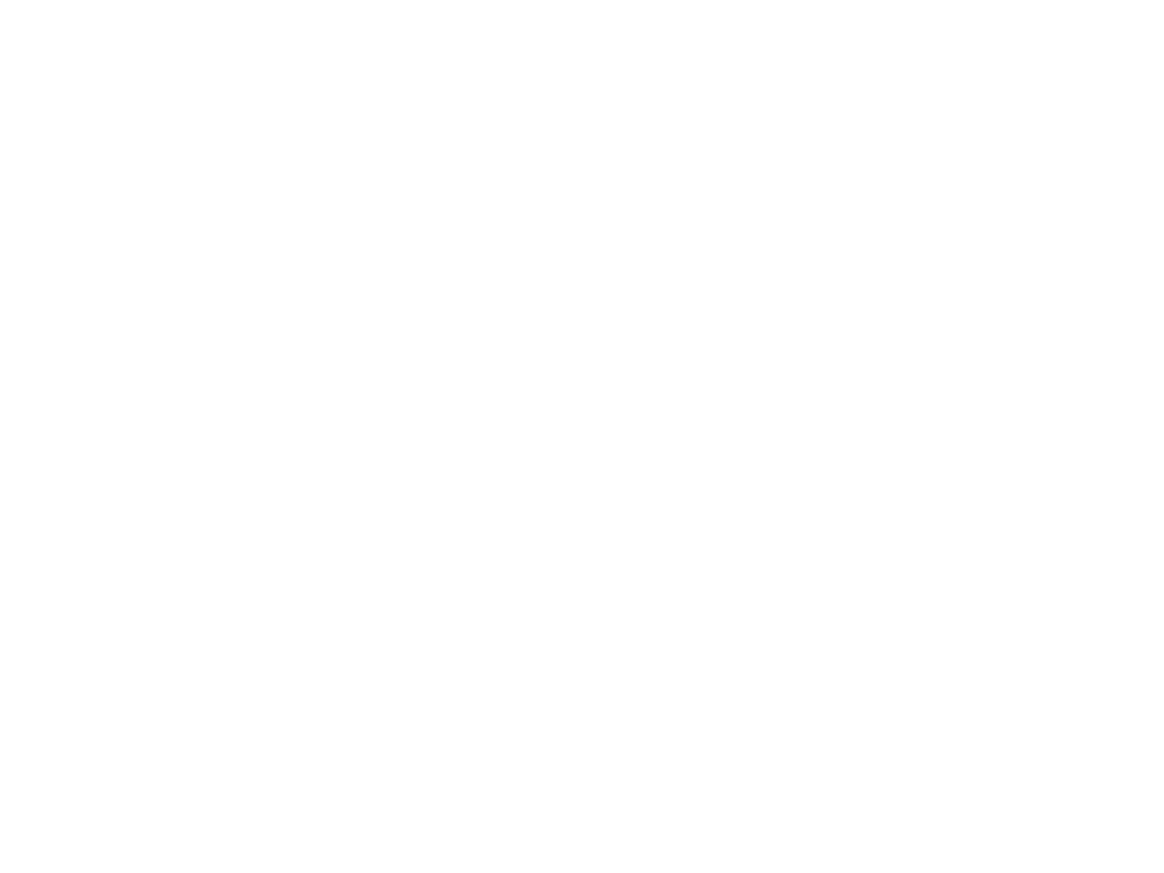

<IPython.core.display.Javascript object>


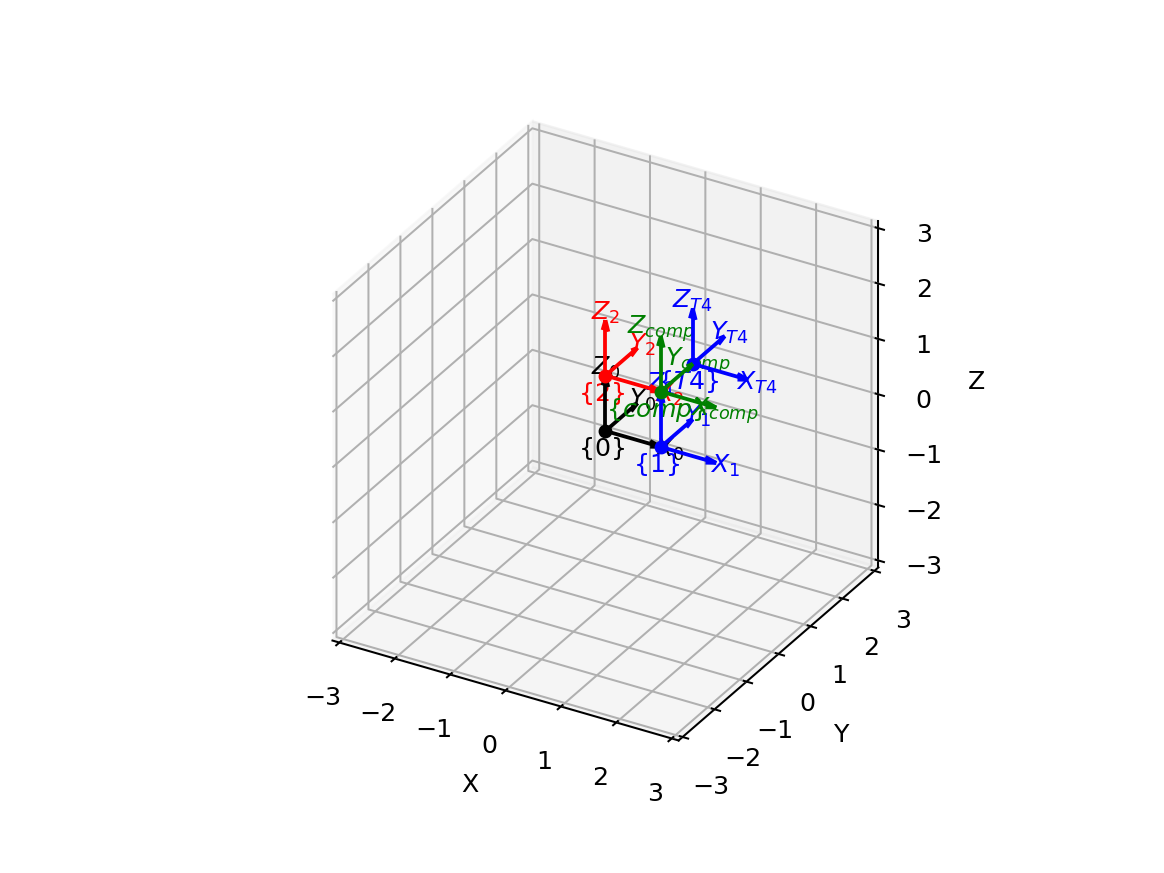

In [3]:
plt.figure()
SE3().plot(frame='0', dims=[-3,3], color='black')

In [4]:
T1 = SE3.Tx(1)
T1.plot(frame='1')

In [5]:
T1

   1         0         0         1         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


In [6]:
T2 = SE3.Tz(1)
T2.plot(frame='2', color='red')

In [7]:
T3 = T2 * T1
T3.plot(frame='comp', color='green')

In [8]:
T1

   1         0         0         1         
   0         1         0         0         
   0         0         1         0         
   0         0         0         1         


In [9]:
T2

   1         0         0         0         
   0         1         0         0         
   0         0         1         1         
   0         0         0         1         


In [10]:
T3

   1         0         0         1         
   0         1         0         0         
   0         0         1         1         
   0         0         0         1         


In [11]:
# Propiedades de un objeto SO3

In [12]:
T3.n # vector n

array([1., 0., 0.])

In [13]:
T3.o

array([0., 1., 0.])

In [14]:
T3.a

array([0., 0., 1.])

In [15]:
T3.R # Submatriz de rotacion

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [16]:
T3.t # Submatriz de traslacion

array([1., 0., 1.])

In [17]:
T3.A # MTH como objeto numpy (perdemos métodos y propiedades)

array([[1., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [18]:
T4 = SE3(1,1,1)
T4.plot(frame='T4')
plt.show()

In [19]:
# Si tenemos la terna 0 asociada a un robot, un punto P definido en base a la misma

<IPython.core.display.Javascript object>


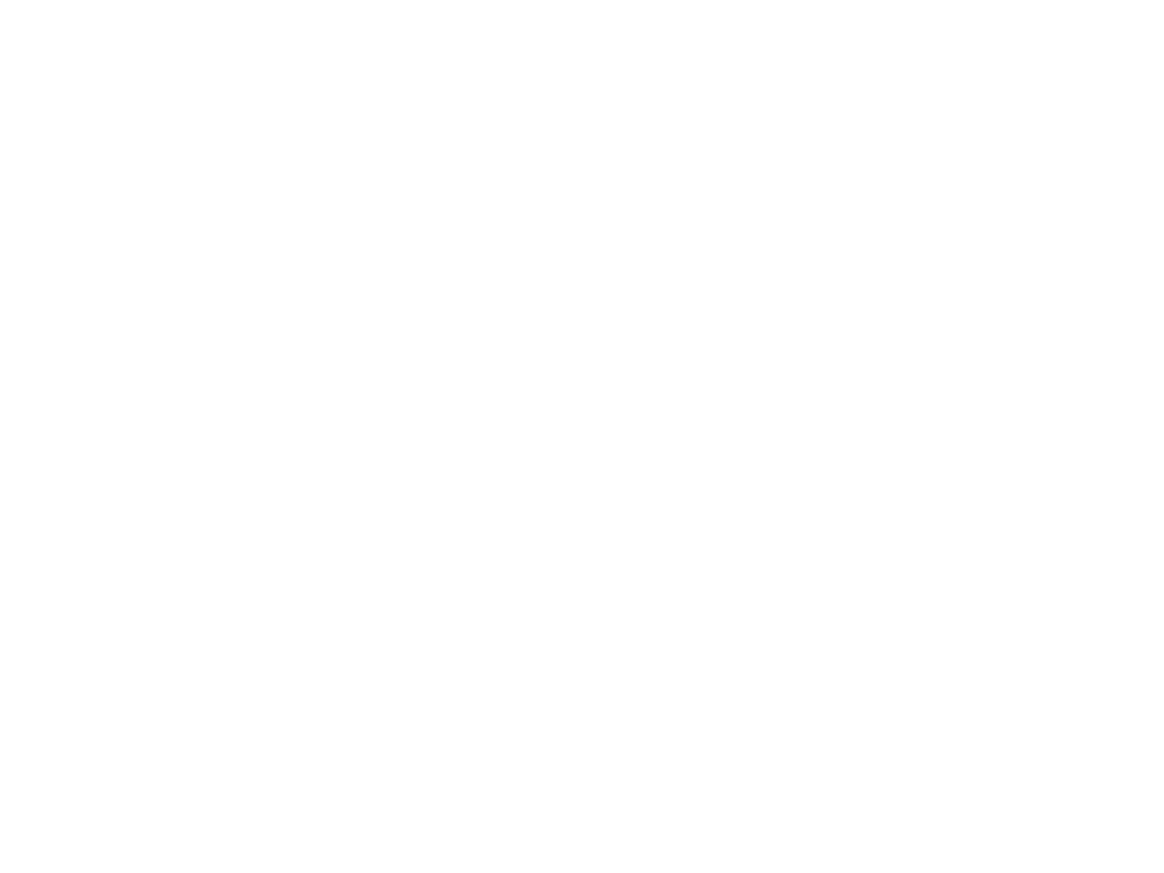

<IPython.core.display.Javascript object>


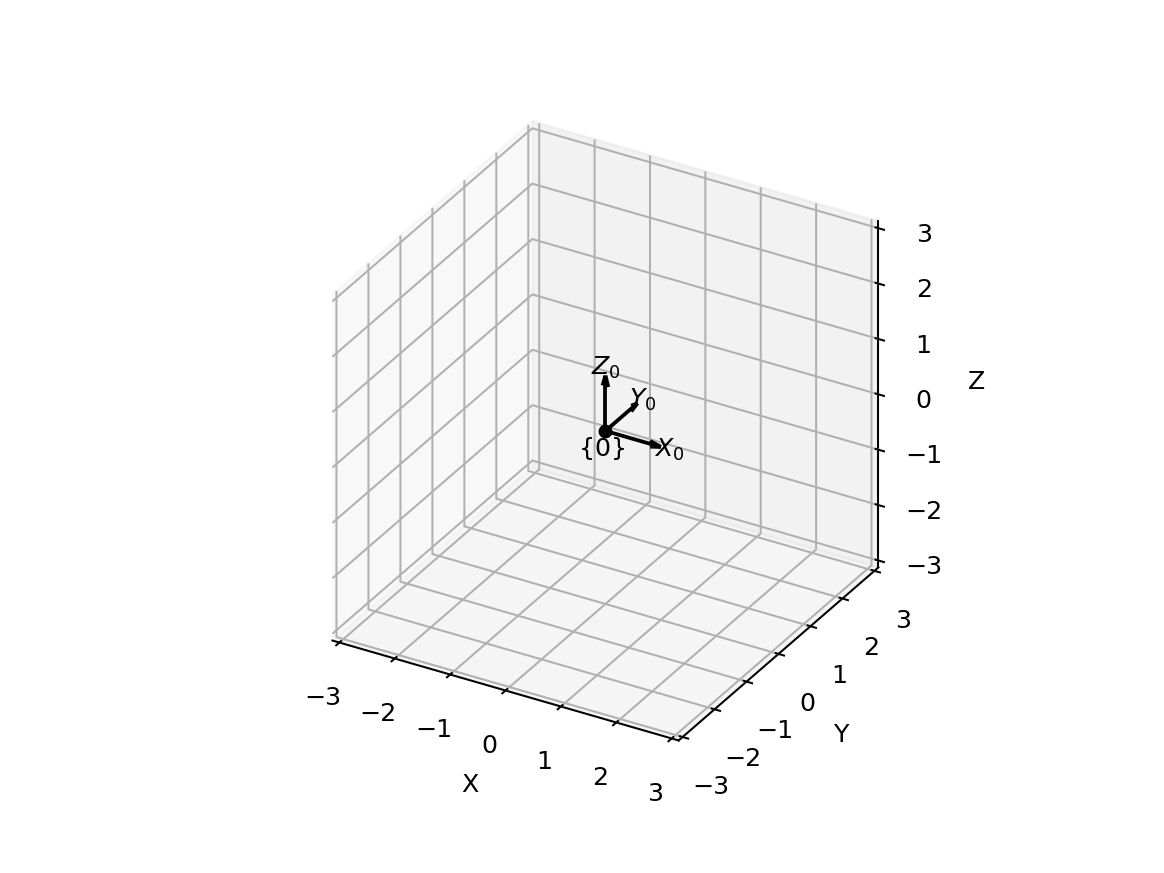

In [20]:
plt.figure()
SE3().plot(frame='0', dims=[-3,3], color='black')

In [21]:
P_0 = np.array([1,2,3])
P_0

array([1, 2, 3])

In [22]:
# Movemos la terna de referencia mediante el vector (4,5,6)
# El mismo punto P, visto desde nuestra nueva terna 1

In [23]:
T = SE3(4,5,6)
T

   1         0         0         4         
   0         1         0         5         
   0         0         1         6         
   0         0         0         1         


In [24]:
P_1 = T * P_0
P_1

array([[5.],
       [7.],
       [9.]])

## Rotaciones ##

In [25]:
R1 = SO3.Ry(pi/4)
R1

   0.7071    0         0.7071    
   0         1         0         
  -0.7071    0         0.7071    


<IPython.core.display.Javascript object>


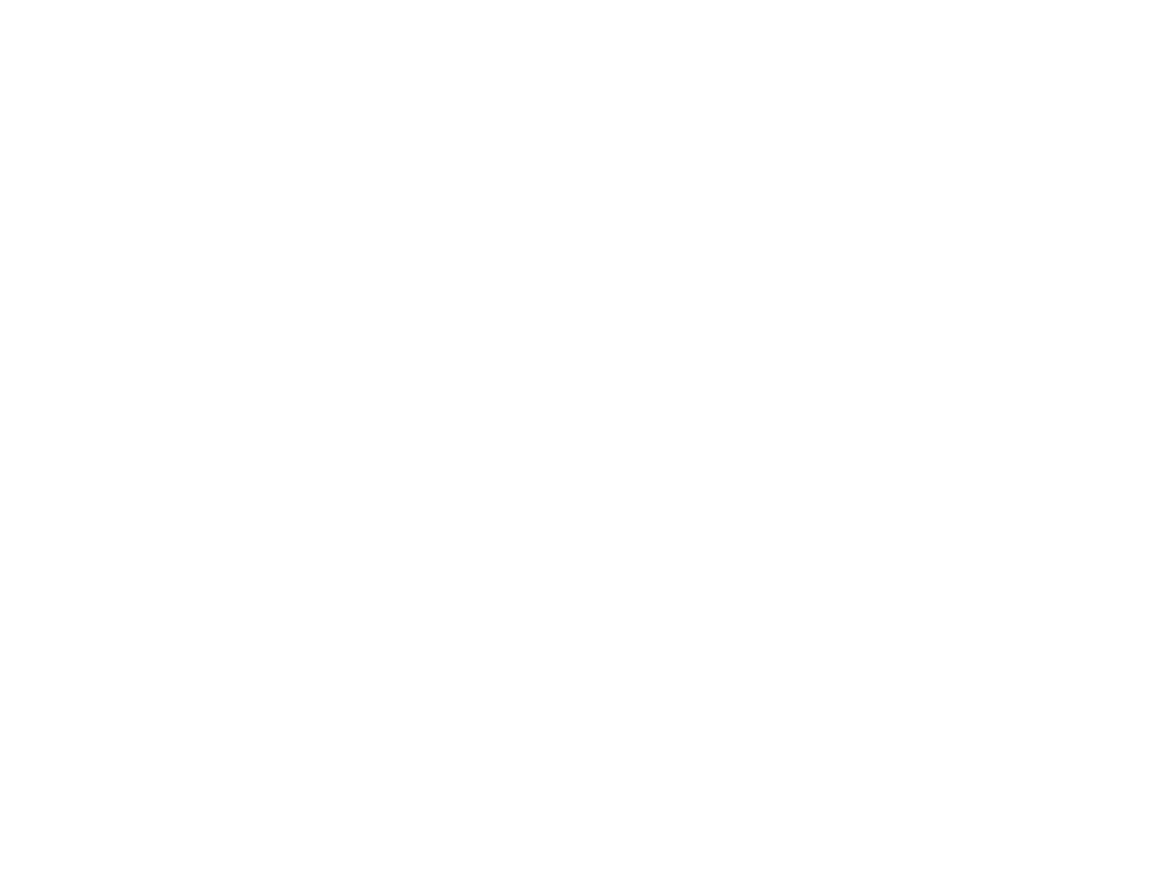

<IPython.core.display.Javascript object>


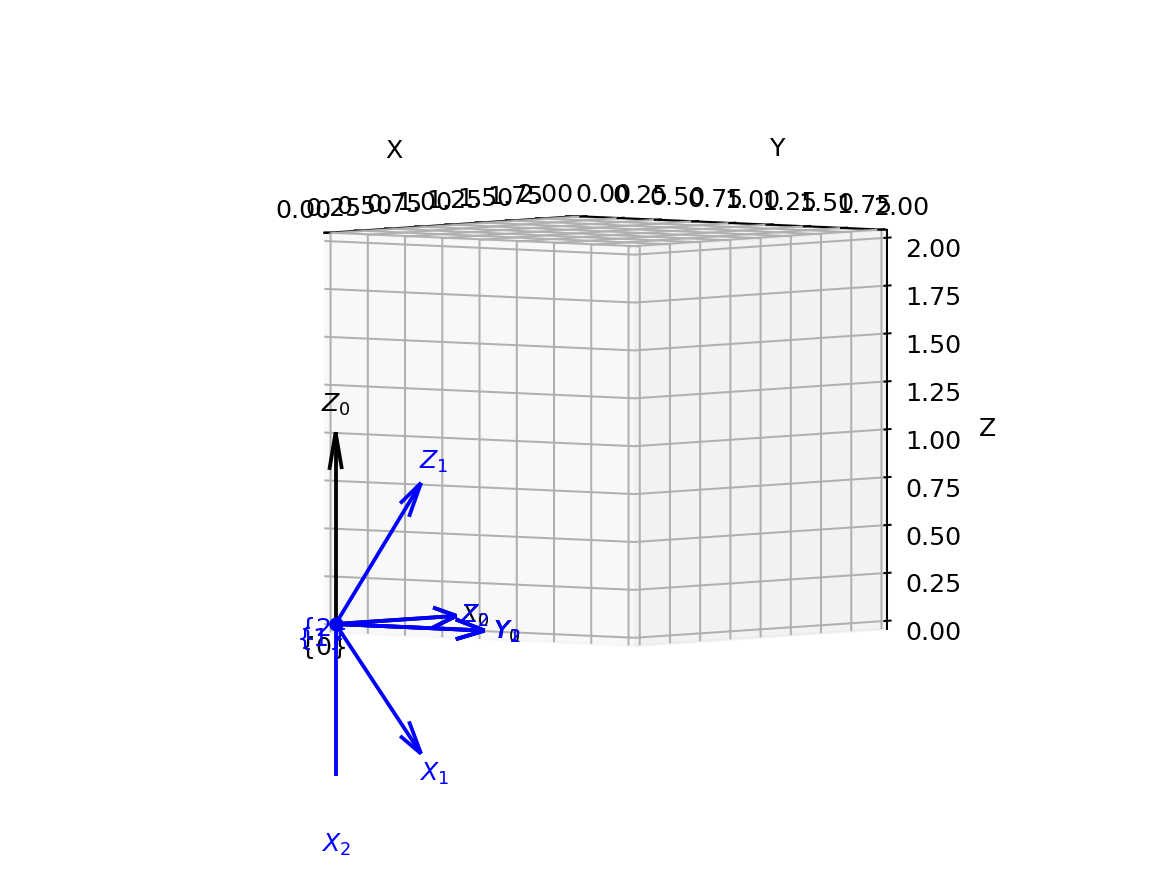

In [26]:
plt.figure()
SE3().plot(frame='0', color='black', dims=[0,2])
R1.plot(frame='1')

In [27]:
R2 = R1 * R1
R2.plot(frame='2')

In [39]:
SO3.Rz(45, 'deg')

   0.7071   -0.7071    0         
   0.7071    0.7071    0         
   0         0         1         


In [42]:
F = SO3.RPY([10, 20, 30], unit='deg') # ZYX RPY
F

   0.8138   -0.441     0.3785    
   0.4698    0.8826    0.01803   
  -0.342     0.1632    0.9254    


In [43]:
F.rpy(unit='deg')

array([10., 20., 30.])

In [44]:
SO3.AngVec(pi/4, [1,1,0])

   0.8536    0.1464    0.5       
   0.1464    0.8536   -0.5       
  -0.5       0.5       0.7071    


## Composición ##

In [45]:
T1 =  SE3(1, 2, 3) * SE3.Rx(30, 'deg')
T1

   1         0         0         1         
   0         0.866    -0.5       2         
   0         0.5       0.866     3         
   0         0         0         1         


<IPython.core.display.Javascript object>


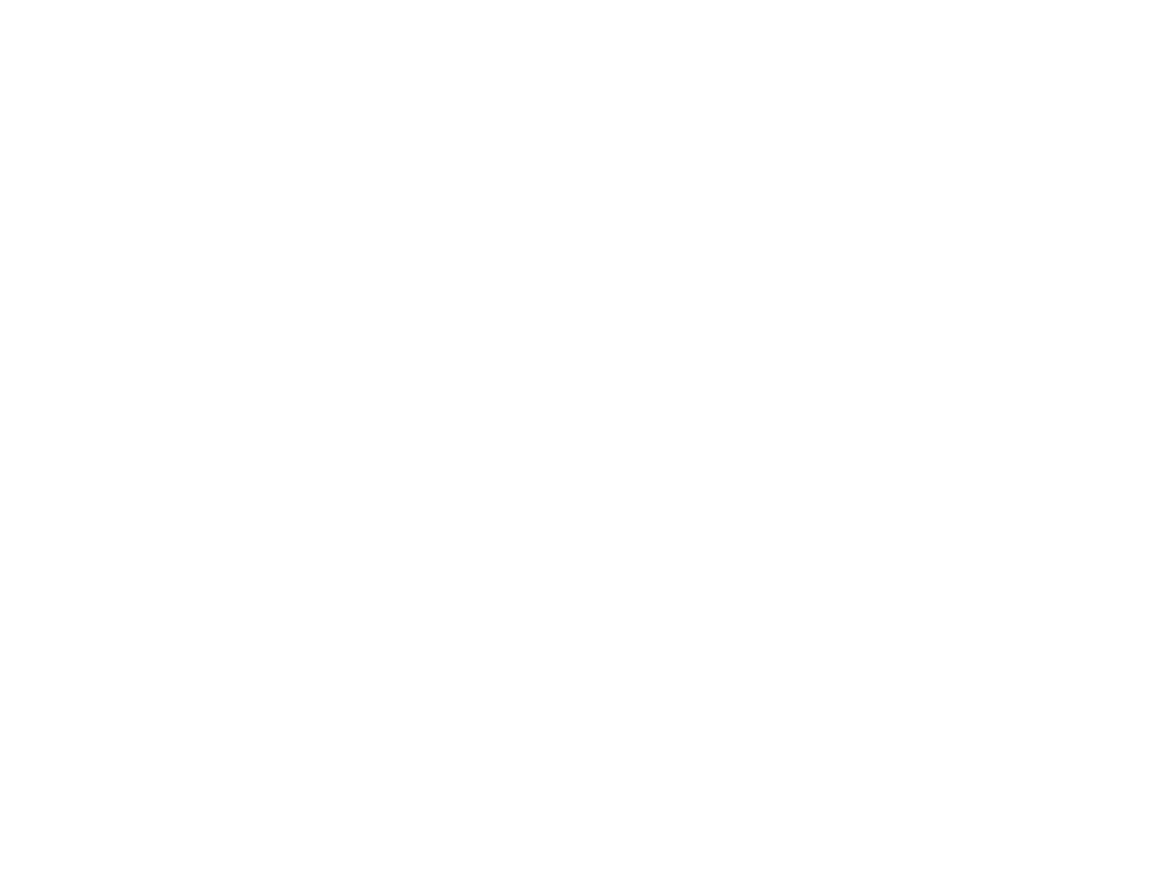

<IPython.core.display.Javascript object>


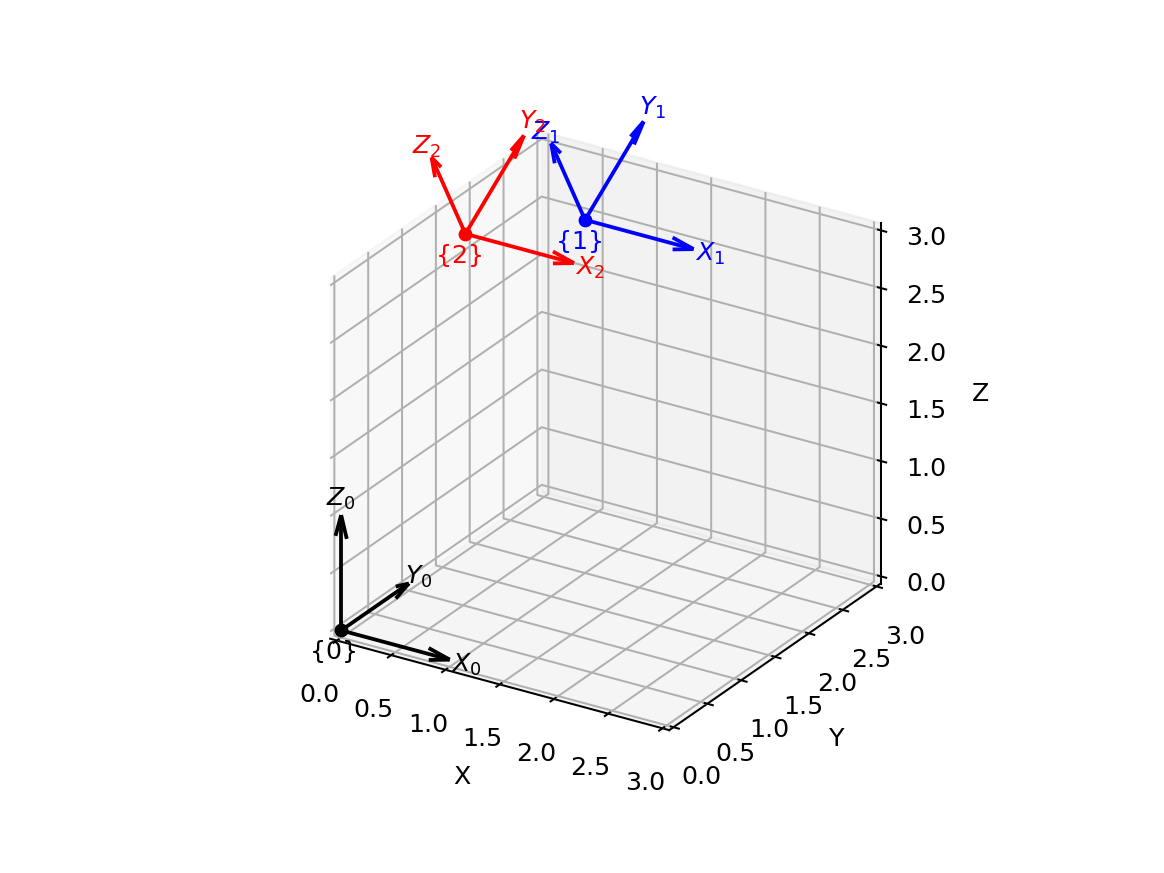

In [46]:
plt.figure()
SE3().plot(frame='0', dims=[0,3], color='black')
T1.plot(frame='1')

In [47]:
T2 = SE3.Rx(30, 'deg') * SE3(1, 2, 3)
T2.plot(frame='2', color='red')

In [48]:
P_0 = [1, 2, 1]
T1 * P_0

array([[2.        ],
       [3.23205081],
       [4.8660254 ]])

## Ejercitación ##

In [36]:
P = np.array([[-1, 1, 1, -1, -1, 1, 1, -1], 
              [-1, -1, 1, 1, -1, -1, 1, 1], 
              [-1, -1, -1, -1, 1, 1, 1, 1]])
P

array([[-1,  1,  1, -1, -1,  1,  1, -1],
       [-1, -1,  1,  1, -1, -1,  1,  1],
       [-1, -1, -1, -1,  1,  1,  1,  1]])

In [49]:
# Realizar una rotación en Z de 90°
# y guardar en resultado en la variable Q
Q = P

<IPython.core.display.Javascript object>


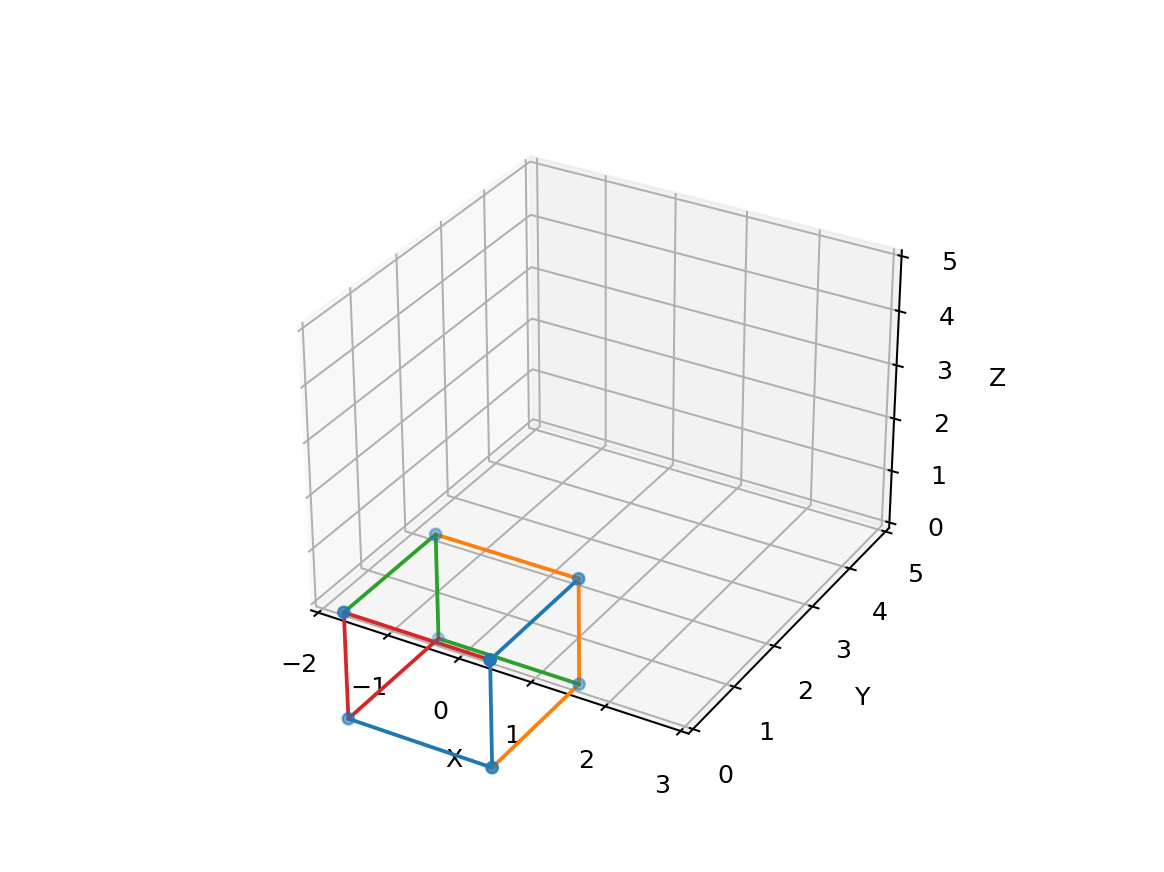

In [50]:
# TEST
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Vertices
ax.scatter(xs=Q[0], ys=Q[1], zs=Q[2], s=20)

# Lados
lines = [[0,1,5,6], [1,2,6,7], [2,3,7,4], [3,0,4,5]]
ax.set_xlim3d(-2, 3); ax.set_ylim3d(0, 5); ax.set_zlim3d(0, 5);
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z');
for line in lines:
    ax.plot([Q[0,i] for i in line], [Q[1,i] for i in line], [Q[2,i] for i in line])